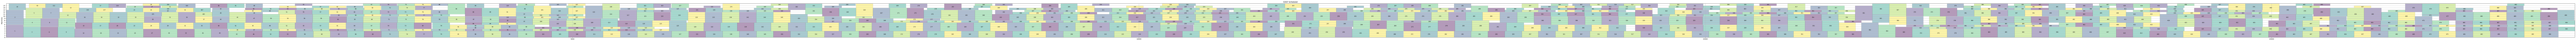

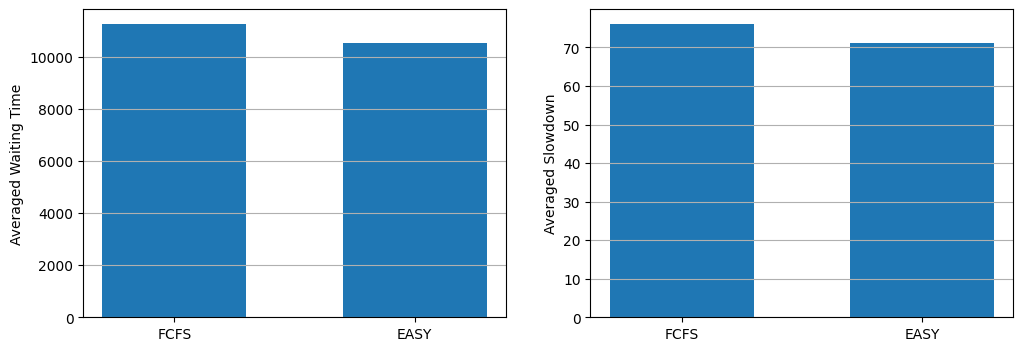

In [54]:
import matplotlib.pyplot as plt
from evalys.jobset import JobSet, ProcSet
from evalys.visu.legacy import plot_gantt
import pandas as pd

def visualize_avg_waiting_time(sim_fcfs, sim_easy):
    sim_fcfs['name'], sim_easy['name'] = "FCFS", "EASY"
    benchmark = pd.concat([sim_fcfs, sim_easy], ignore_index=True)

    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.bar('name', 'mean_waiting_time', data=benchmark, width=0.6)
    plt.grid(axis='y')
    plt.ylabel("Averaged Waiting Time")

    plt.subplot(1, 2, 2)
    plt.bar('name', 'mean_slowdown', data=benchmark, width=0.6)
    plt.grid(axis='y')
    plt.ylabel("Averaged Slowdown")

    plt.show()
    
def visualize_schedule(jobs_fcfs, jobs_easy):

    _, ax_list = plt.subplots(1, 1, figsize=(300, 4))
    # plot_gantt(jobs_fcfs, ax=ax_list[0], title="FCFS Scheduler")
    plot_gantt(jobs_easy, ax=ax_list, title="EASY Scheduler")

    plt.ylim(ymin=0, ymax=16)
    plt.yticks(list(range(16)))
    plt.savefig('plt/batsim/easy.png')
    plt.show()


jobs_fcfs = pd.read_csv('results/batsim/fcfs_jobs.csv')
jobs_fcfs['job_id'] = jobs_fcfs['job_id'].astype(str)  
jobs_fcfs['profile'] = jobs_fcfs['profile'].astype(str)
jobs_fcfs = pd.DataFrame(jobs_fcfs)
jobs_fcfs['allocated_resources'] = jobs_fcfs['allocated_resources'].apply(lambda x: ProcSet.from_str(x))
jobs_fcfs = JobSet(jobs_fcfs)


jobs_easy = pd.read_csv('results/batsim/easy_jobs.csv')
jobs_easy['job_id'] = jobs_easy['job_id'].astype(str)
jobs_easy['profile'] = jobs_easy['profile'].astype(str) 
jobs_easy = pd.DataFrame(jobs_easy)
jobs_easy['allocated_resources'] = jobs_easy['allocated_resources'].apply(lambda x: ProcSet.from_str(x))
jobs_easy = JobSet(jobs_easy)

sim_fcfs = pd.read_csv('results/batsim/fcfs_sims.csv')
sim_fcfs = pd.DataFrame(sim_fcfs)

sim_easy = pd.read_csv('results/batsim/easy_sims.csv')
sim_easy = pd.DataFrame(sim_easy)

visualize_schedule(jobs_fcfs, jobs_easy)
visualize_avg_waiting_time(sim_fcfs, sim_easy)

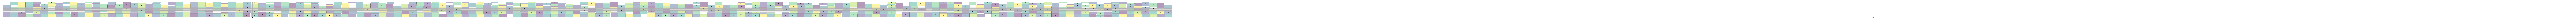

In [ ]:
import matplotlib.pyplot as plt
from evalys.jobset import JobSet, ProcSet
from evalys.visu.legacy import plot_gantt
import pandas as pd

def visualize_avg_waiting_time(jobs_f, sim_f, jobs_e, sim_e):
    fcfs, easy = jobs_f.to_dataframe(), jobs_e.to_dataframe()

    fcfs, easy = JobSet(fcfs), JobSet(easy)

    fcfs, easy = sim_f.to_dataframe(), sim_e.to_dataframe()
    fcfs['name'], easy['name'] = "FCFS", "EASY"
    benchmark = pd.concat([fcfs, easy], ignore_index=True)

    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.bar('name', 'mean_waiting_time', data=benchmark, width=0.6)
    plt.grid(axis='y')
    plt.ylabel("Averaged Waiting Time")

    plt.subplot(1, 2, 2)
    plt.bar('name', 'mean_slowdown', data=benchmark, width=0.6)
    plt.grid(axis='y')
    plt.ylabel("Averaged Slowdown")

    plt.show()
    
def visualize_schedule(jobs_easy):

    _, ax_list = plt.subplots(1, 1, sharey=True, figsize=(650, 4))
    # plot_gantt(jobs_fcfs, ax=ax_list[0], title="FCFS")
    plot_gantt(jobs_easy, ax=ax_list[0], title="EASY")

    plt.ylim(ymin=0, ymax=16)
    plt.yticks(list(range(16)))
    plt.show()

# jobs_fcfs = pd.read_csv('results/sp/fcfs_jobs.csv')
# jobs_fcfs['job_id'] = jobs_fcfs['job_id'].astype(str)  
# jobs_fcfs['profile'] = jobs_fcfs['profile'].astype(str)
# jobs_fcfs = pd.DataFrame(jobs_fcfs)
# jobs_fcfs['allocated_resources'] = jobs_fcfs['allocated_resources'].apply(lambda x: ProcSet.from_str(x))
# jobs_fcfs = JobSet(jobs_fcfs)

jobs_easy = pd.read_csv('results/sp/easy_jobs.csv')
jobs_easy['job_id'] = jobs_easy['job_id'].astype(str)  
jobs_easy['profile'] = jobs_easy['profile'].astype(str)
jobs_easy = pd.DataFrame(jobs_easy)
jobs_easy['allocated_resources'] = jobs_easy['allocated_resources'].apply(lambda x: ProcSet.from_str(x))
jobs_easy = JobSet(jobs_easy)

visualize_schedule( jobs_easy)

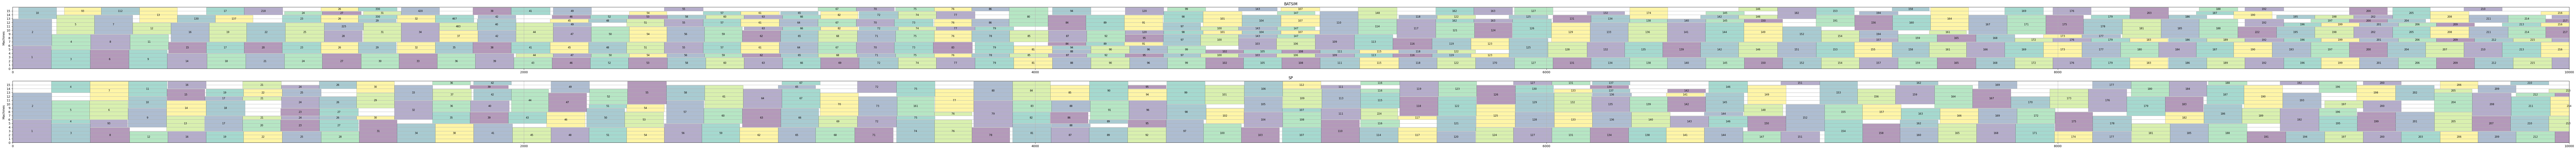

In [59]:
import matplotlib.pyplot as plt
from evalys.jobset import JobSet, ProcSet
from evalys.visu.legacy import plot_gantt
import pandas as pd

def visualize_avg_waiting_time(jobs_f, sim_f, jobs_e, sim_e):
    fcfs, easy = jobs_f.to_dataframe(), jobs_e.to_dataframe()

    fcfs, easy = JobSet(fcfs), JobSet(easy)

    fcfs, easy = sim_f.to_dataframe(), sim_e.to_dataframe()
    fcfs['name'], easy['name'] = "FCFS", "EASY"
    benchmark = pd.concat([fcfs, easy], ignore_index=True)

    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.bar('name', 'mean_waiting_time', data=benchmark, width=0.6)
    plt.grid(axis='y')
    plt.ylabel("Averaged Waiting Time")

    plt.subplot(1, 2, 2)
    plt.bar('name', 'mean_slowdown', data=benchmark, width=0.6)
    plt.grid(axis='y')
    plt.ylabel("Averaged Slowdown")

    plt.show()
    
def visualize_schedule(jobs_easy_batsim, jobs_easy_sp):

    _, ax_list = plt.subplots(nrows=2, ncols=1, figsize=(150, 8))
    # plot_gantt(jobs_fcfs, ax=ax_list[0], title="FCFS")
    plot_gantt(jobs_easy_batsim, ax=ax_list[0], title="BATSIM")
    plot_gantt(jobs_easy_sp, ax=ax_list[1], title="SP")
    
    ax_list[0].set_ylim(0, 16)
    ax_list[1].set_ylim(0, 16)
    ax_list[0].set_xlim(0, 10000)
    ax_list[1].set_xlim(0, 10000)
    ax_list[0].set_yticks(range(16))
    ax_list[1].set_yticks(range(16))

    plt.savefig('plt/comparison/easy.png')
    plt.show()

jobs_easy_batsim = pd.read_csv('results/batsim/easy_jobs.csv')
jobs_easy_batsim['job_id'] = jobs_easy_batsim['job_id'].astype(str)
jobs_easy_batsim['profile'] = jobs_easy_batsim['profile'].astype(str) 
jobs_easy_batsim = pd.DataFrame(jobs_easy_batsim)
jobs_easy_batsim['allocated_resources'] = jobs_easy_batsim['allocated_resources'].apply(lambda x: ProcSet.from_str(x))
jobs_easy_batsim = JobSet(jobs_easy_batsim)

jobs_easy_sp = pd.read_csv('results/sp/easy_jobs.csv')
jobs_easy_sp['job_id'] = jobs_easy_sp['job_id'].astype(str)  
jobs_easy_sp['profile'] = jobs_easy_sp['profile'].astype(str)
jobs_easy_sp = pd.DataFrame(jobs_easy_sp)
jobs_easy_sp['allocated_resources'] = jobs_easy_sp['allocated_resources'].apply(lambda x: ProcSet.from_str(x))
jobs_easy_sp = JobSet(jobs_easy_sp)

visualize_schedule(jobs_easy_batsim, jobs_easy_sp)